[Post Link](https://towardsdatascience.com/bayesian-inference-and-markov-chain-monte-carlo-sampling-in-python-bada1beabca7)

In [3]:
import scipy.stats as stats
import numpy as np

In [4]:
# Define the data
x = 57
n = 100

# Define the Likelihood P(x|p) - binomial distribution
def likelihood(p):
    return stats.binom.pmf(x, n, p)

In [5]:
# Define Prior Function - Uniform Distribution
def prior(p):
    return stats.uniform.pdf(p)

In [6]:
# Create function to compute acceptance ratio
# This function will accept the current and proposed values of p
def acceptance_ratio(p, p_new):
    # Return R, using the functions we created before
    return min(1, ((likelihood(p_new) / likelihood(p)) * (prior(p_new) / prior(p))))

In [7]:
# Create empty list to store samples
results = []

# Initialzie a value of p
p = np.random.uniform(0, 1)

# Define model parameters
n_samples = 25000
burn_in = 5000
lag = 5

# Create the MCMC loop
for i in range(n_samples):
    # Propose a new value of p randomly from a uniform distribution between 0 and 1
    p_new = np.random.random_sample()
    # Compute acceptance probability
    R = acceptance_ratio(p, p_new)
    # Draw random sample to compare R to
    u = np.random.random_sample()
    # If R is greater than u, accept the new value of p (set p = p_new)
    if u < R:
        p = p_new
    # Record values after burn in - how often determined by lag
    if i > burn_in and i%lag == 0:
        results.append(p)

In [9]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

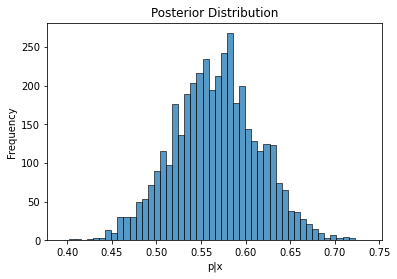

In [17]:
# Posterior Distribution Plot w/ Seaborn
sns.histplot(results, bins=50)
plt.title('Posterior Distribution')
# x-axis label
plt.xlabel('p|x')
# y-axis label
plt.ylabel('Frequency')

# Show plot
plt.show()

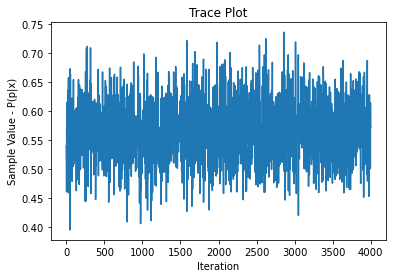

In [14]:
# Trace Plot
plt.plot(results)
plt.title('Trace Plot')
# x-axis label
plt.xlabel('Iteration')
# y-axis label
plt.ylabel('Sample Value - P(p|x)')

# Show plot
plt.show()